[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/03%20Machine%20Learning/notebooks/01-Preprocesamiento.ipynb)

# ⭕ Práctica: Dateset PIMA

The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. **Missing values are believed to be encoded with zero values**. The variable names are as follows:

    Number of times pregnant.
    Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
    Diastolic blood pressure (mm Hg).
    Triceps skinfold thickness (mm).
    2-Hour serum insulin (mu U/ml).
    Body mass index (weight in kg/(height in m)^2).
    Diabetes pedigree function.
    Age (years).
    Class variable (0 or 1).

Más información: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
df = pd.read_csv(url,header=None)

df

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


⭕ Ejercicio 1

* Modificar el nombre de las columnas de acuerdo a la información anterior.

* Hacer un análisis exploratorio:
    * ¿Qué tipo de variable es cada columna?
    * ¿Hay datos faltantes en alguna columna? Toma en cuenta la información del dataset y auxiliate de histogramas y otras herramientas exploratorias.
    * ¿Qué variable tiene más datos faltantes?
    * ¿Qué rango tienen los datos en cada columna?

In [13]:
# Importar
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Renombrar columnas
df.columns = [
    "Pregnancies",  # Número de veces embarazada
    "Glucose",      # Concentración de glucosa
    "BloodPressure",# Presión diastólica
    "SkinThickness",# Pliegue cutáneo del tríceps
    "Insulin",      # Insulina en sangre a las 2 horas
    "BMI",          # Índice de masa corporal
    "DiabetesPedigreeFunction",  # Función de herencia de diabetes
    "Age",          # Edad
    "Outcome"       # Variable objetivo (0 = no diabetes, 1 = diabetes)
]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# Tipo de variable
print(df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


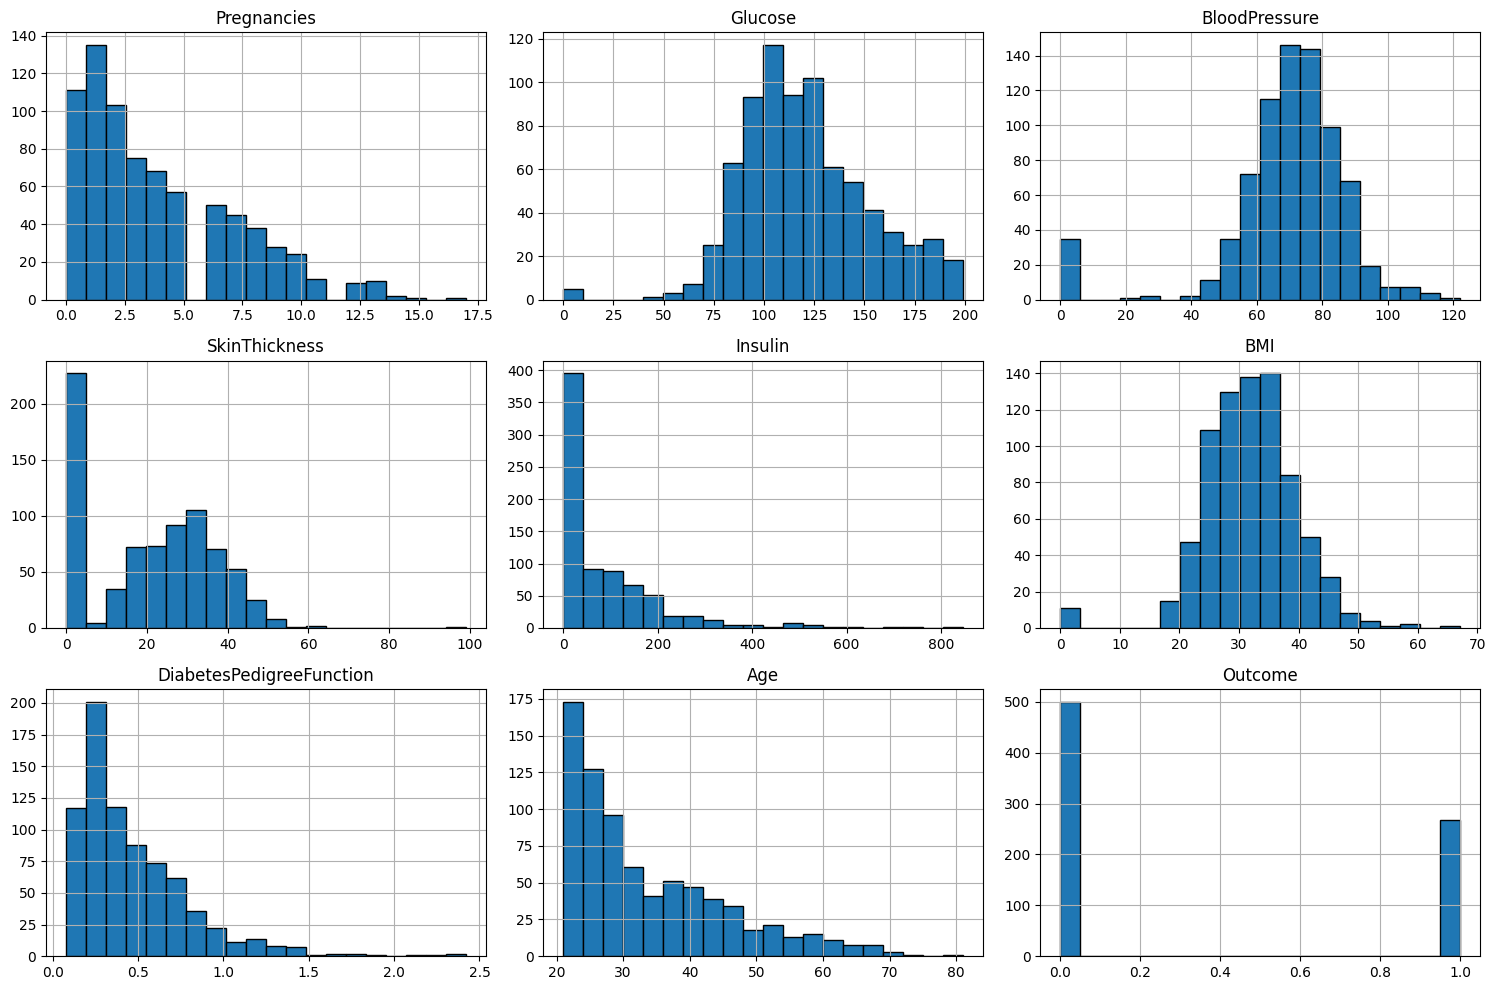

In [8]:
# Histograma de cada variable
df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()

**Observaciones:**


*  Las columnas de GLucose, BloodPressure, SkinThickness, Insulin y BMI no deberían de tener valores de 0, por lo que probablemente sean valores faltantes.



⭕ Ejercicio 2

Realizar las siguientes tareas de preprocesamiento:

* Para lididar con los valores faltantes hay dos opciones: Eliminar los renglones con valores faltantes o imputarlos. ¿Cuál eliges y por qué? Realiza esta tarea en todas las columnas.
* Filtrar los valores del BMI en algún rango de tu elección.
* Normalizar todos los valores continuos.
* Cambiar las variables categóricas por *one-hot*

In [11]:
# Cambiemos los 0 de esas columnas por NaN
cols_faltantes = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_faltantes] = df[cols_faltantes].replace(0, np.nan)

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Observaciones:**


*  Eliminar filas con valores faltantes reduciría demasiado el dataset.


*   Es mejor preservar los datos imputando con la mediana






In [14]:
# Realizar imputación con mediana
imputer = SimpleImputer(strategy='median')
df[cols_faltantes] = imputer.fit_transform(df[cols_faltantes])

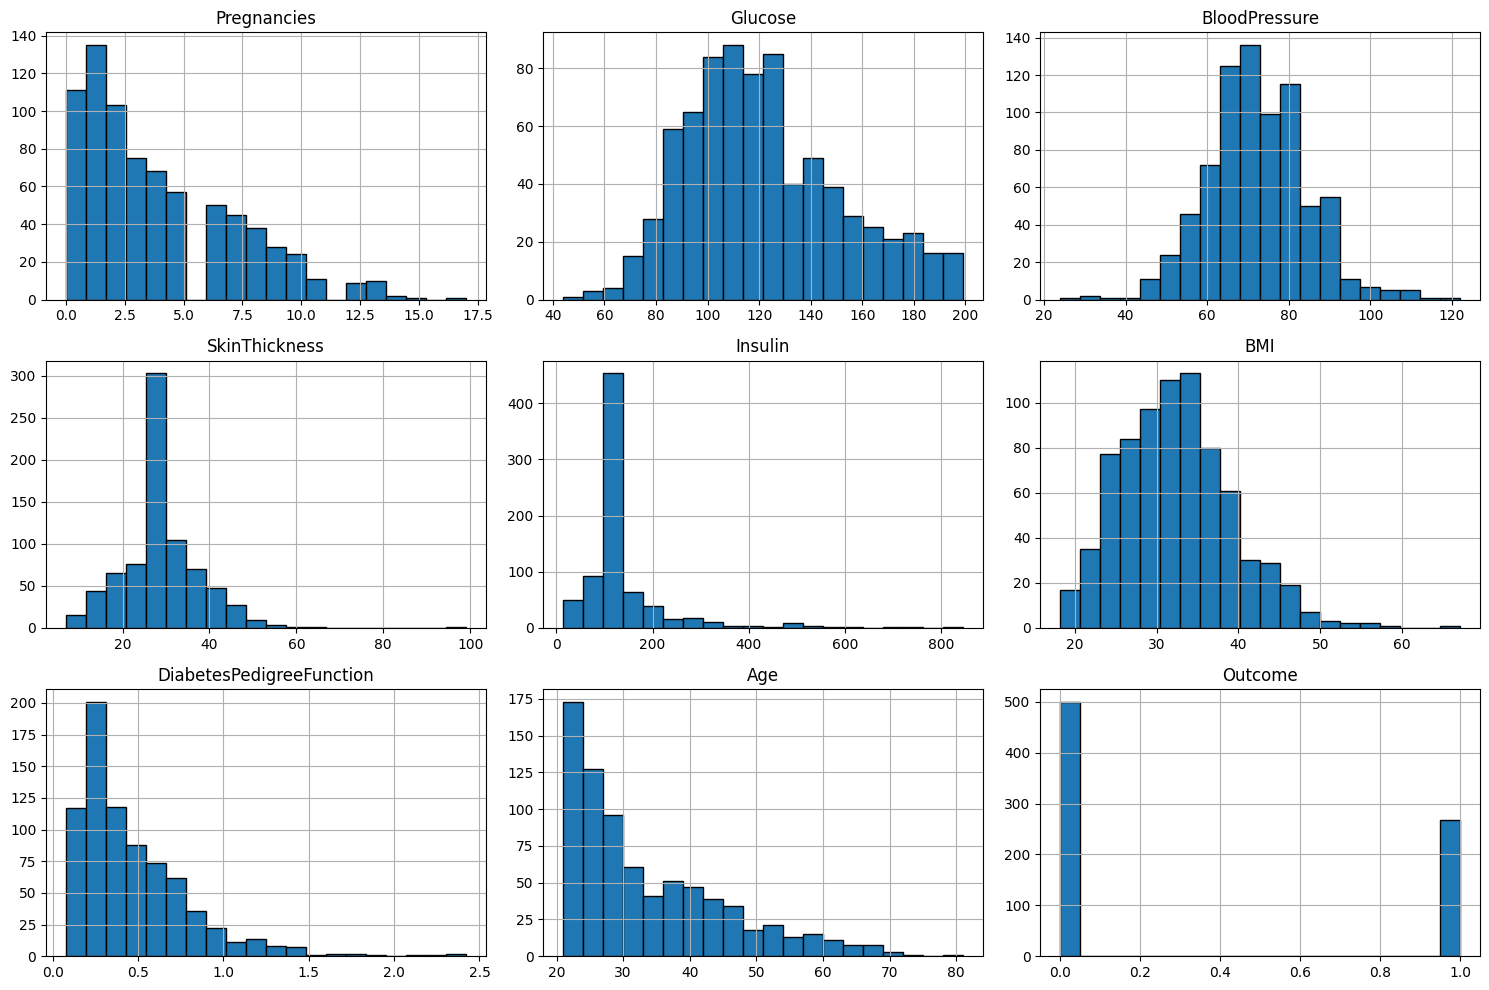

In [15]:
# Histograma de cada variable
df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()

In [20]:
# Filtrar valores extremos del BMI (ej: menos de 18.5 y mas de 60)
df = df[(df["BMI"] >= 18.5) & (df["BMI"] <= 60)]

# Se puede repetir con otras variables que tambien tienen valores atípicos
df = df[(df["BloodPressure"] >= 50) & (df["BloodPressure"] <= 100)]
df = df[(df["Insulin"] <= 400)]
df = df[(df["SkinThickness"] <= 70)]
df = df[(df["DiabetesPedigreeFunction"] <= 2)]


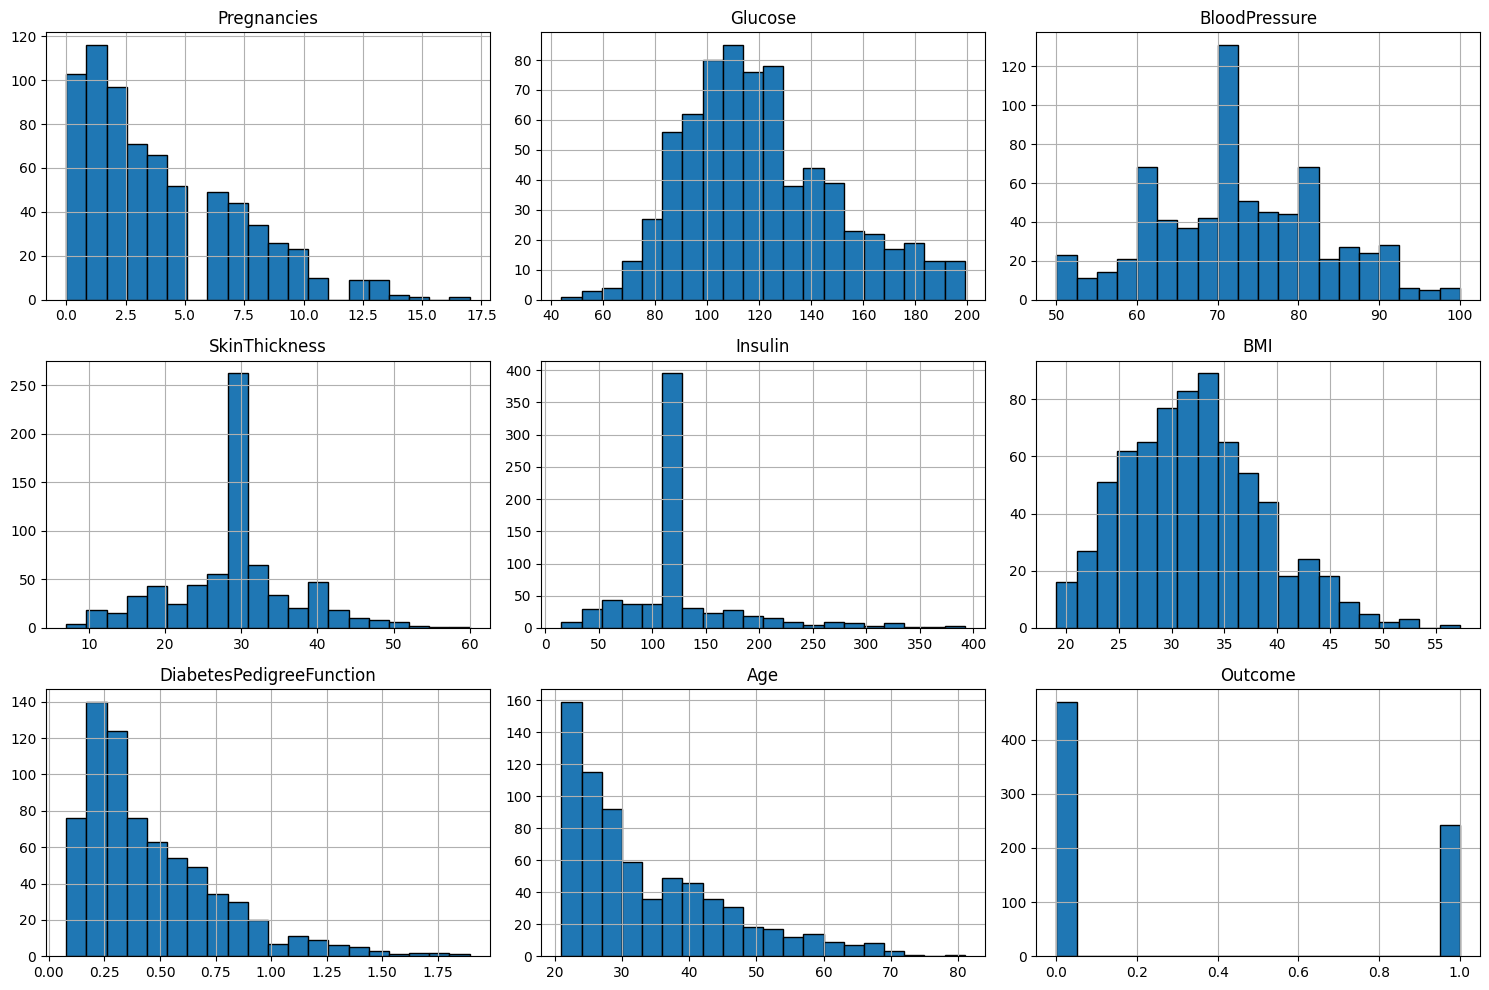

In [21]:
# Histograma de cada variable
df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()

In [24]:
# Normalización de variables continuas
continuous_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
scaler = MinMaxScaler()
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

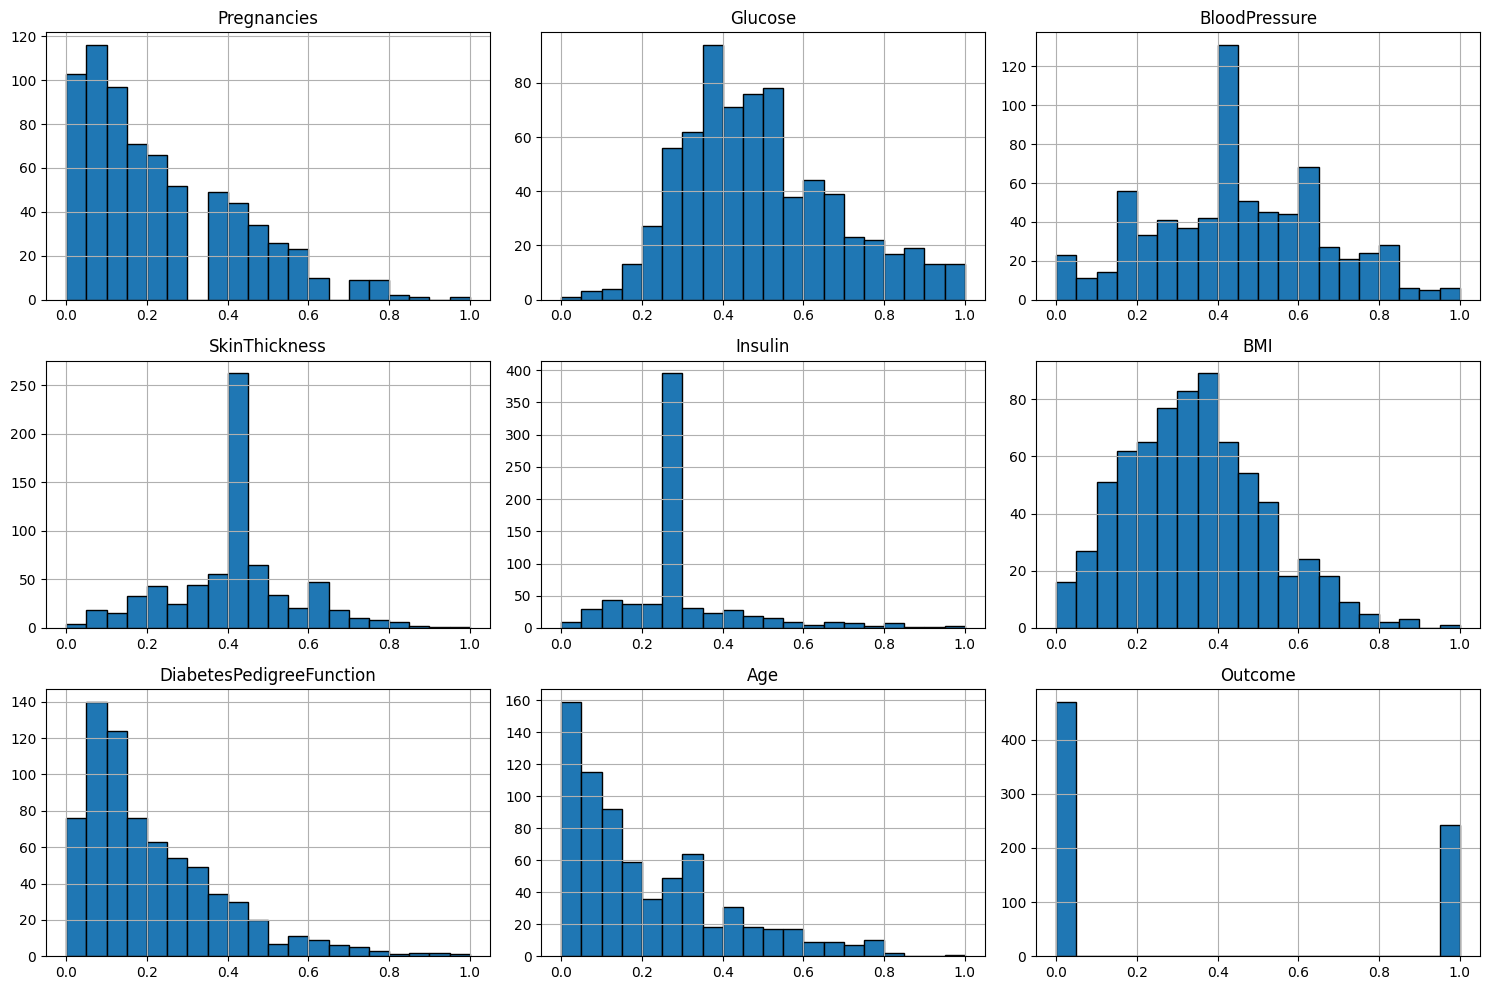

In [25]:
# Histograma de cada variable
df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()